<a href="https://colab.research.google.com/github/samridhibisht/NLP/blob/main/nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://realpython.com/nltk-nlp-python/#getting-started-with-pythons-nltk

In [28]:
import pandas as pd
df=pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
df.head()
data = df['Review Text']
b=data.to_string(index=False)
print(b)
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')

words=[]
sentences=[]

for i in data:
  text=i
  text=str(text)
  # Tokenization
  words = word_tokenize(text)
  sentences = sent_tokenize(text)


Absolutely wonderful - silky and sexy and comfo...
Love this dress!  it's sooo pretty.  i happened...
I had such high hopes for this dress and really...
I love, love, love this jumpsuit. it's fun, fli...
This shirt is very flattering to all due to the...
I love tracy reese dresses, but this one is not...
I aded this in my basket at hte last mintue to ...
I ordered this in carbon for store pick up, and...
I love this dress. i usually get an xs but it r...
I'm 5"5' and 125 lbs. i ordered the s petite to...
Dress runs small esp where the zipper area runs...
This dress is perfection! so pretty and flatter...
More and more i find myself reliant on the revi...
Bought the black xs to go under the larkspur mi...
This is a nice choice for holiday gatherings. i...
I took these out of the package and wanted them...
Material and color is nice.  the leg opening is...
Took a chance on this blouse and so glad i did....
A flattering, super cozy coat.  will work well ...
I love the look and feel of thi

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
for i in words:
  print(i)

This
dress
in
a
lovely
platinum
is
feminine
and
fits
perfectly
,
easy
to
wear
and
comfy
,
too
!
highly
recommend
!


In [30]:
#POS TAGGING
pos_tags=pos_tag(words)
pos_tags

[('This', 'DT'),
 ('dress', 'NN'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('lovely', 'JJ'),
 ('platinum', 'NN'),
 ('is', 'VBZ'),
 ('feminine', 'JJ'),
 ('and', 'CC'),
 ('fits', 'VBZ'),
 ('perfectly', 'RB'),
 (',', ','),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('wear', 'VB'),
 ('and', 'CC'),
 ('comfy', 'VB'),
 (',', ','),
 ('too', 'RB'),
 ('!', '.'),
 ('highly', 'RB'),
 ('recommend', 'JJ'),
 ('!', '.')]

In [31]:
#stopword removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_words

['dress',
 'lovely',
 'platinum',
 'feminine',
 'fits',
 'perfectly',
 ',',
 'easy',
 'wear',
 'comfy',
 ',',
 '!',
 'highly',
 'recommend',
 '!']

In [32]:
#Stemming
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
stemmed_words=[stemmer.stem(word) for word in words]
stemmed_words

['thi',
 'dress',
 'in',
 'a',
 'love',
 'platinum',
 'is',
 'feminin',
 'and',
 'fit',
 'perfectli',
 ',',
 'easi',
 'to',
 'wear',
 'and',
 'comfi',
 ',',
 'too',
 '!',
 'highli',
 'recommend',
 '!']

In [33]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer= WordNetLemmatizer()
lemmas=[lemmatizer.lemmatize(word) for word in stemmed_words]
lemmas

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['thi',
 'dress',
 'in',
 'a',
 'love',
 'platinum',
 'is',
 'feminin',
 'and',
 'fit',
 'perfectli',
 ',',
 'easi',
 'to',
 'wear',
 'and',
 'comfi',
 ',',
 'too',
 '!',
 'highli',
 'recommend',
 '!']

In [34]:
#chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = str(cp.parse(pos_tags))
result

'(S\n  (NP This/DT dress/NN)\n  in/IN\n  (NP a/DT lovely/JJ platinum/NN)\n  is/VBZ\n  feminine/JJ\n  and/CC\n  fits/VBZ\n  perfectly/RB\n  ,/,\n  easy/JJ\n  to/TO\n  wear/VB\n  and/CC\n  comfy/VB\n  ,/,\n  too/RB\n  !/.\n  highly/RB\n  recommend/JJ\n  !/.)'

In [35]:
#chinking
grammar = """
Chunk: {<.*>+}
       }<JJ>{"""
cp = nltk.RegexpParser(grammar)
result = str(cp.parse(pos_tags))
result

'(S\n  (Chunk This/DT dress/NN in/IN a/DT)\n  lovely/JJ\n  (Chunk platinum/NN is/VBZ)\n  feminine/JJ\n  (Chunk and/CC fits/VBZ perfectly/RB ,/,)\n  easy/JJ\n  (Chunk to/TO wear/VB and/CC comfy/VB ,/, too/RB !/. highly/RB)\n  recommend/JJ\n  (Chunk !/.))'

In [38]:
#NER
def extract_ne(sents):
    return set(
         " ".join(i[0] for i in t)
         for t in result
         if hasattr(t, "label") and t.label() == "NE"
     )
print(extract_ne(b))


set()


In [59]:
#Concordance
from nltk.text import Text
words=Text(words)
words.concordance("dress")

Displaying 1 of 1 matches:
This dress in a lovely platinum is feminine and


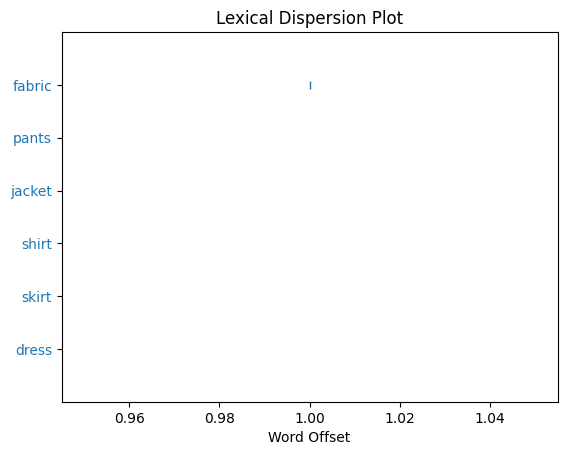

In [61]:
#dispersion plot
words.dispersion_plot(
    ["dress","skirt","shirt","jacket","pants","fabric"]
)

In [63]:
#frequency distribution
from nltk import FreqDist
fd=FreqDist(words)
fd
fd.most_common(20)

[('and', 2),
 (',', 2),
 ('!', 2),
 ('This', 1),
 ('dress', 1),
 ('in', 1),
 ('a', 1),
 ('lovely', 1),
 ('platinum', 1),
 ('is', 1),
 ('feminine', 1),
 ('fits', 1),
 ('perfectly', 1),
 ('easy', 1),
 ('to', 1),
 ('wear', 1),
 ('comfy', 1),
 ('too', 1),
 ('highly', 1),
 ('recommend', 1)]

In [64]:
meaningful_words = [
     word for word in words if word.casefold() not in stop_words
]
fd = FreqDist(meaningful_words)
fd.most_common(20)

[(',', 2),
 ('!', 2),
 ('dress', 1),
 ('lovely', 1),
 ('platinum', 1),
 ('feminine', 1),
 ('fits', 1),
 ('perfectly', 1),
 ('easy', 1),
 ('wear', 1),
 ('comfy', 1),
 ('highly', 1),
 ('recommend', 1)]

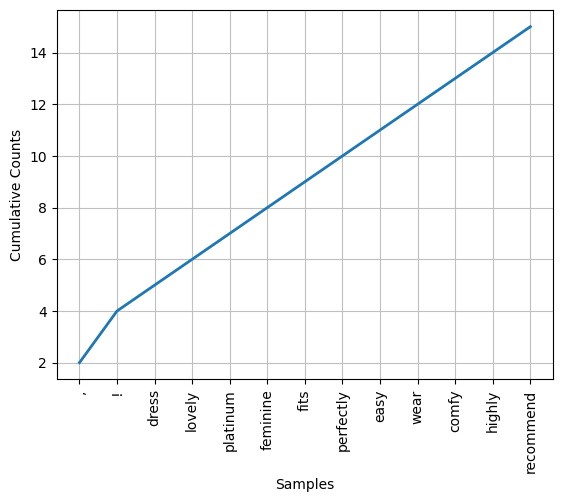

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [65]:
fd.plot(20, cumulative=True)

In [68]:
#collocation
lemmas=Text(lemmas)
lemmas.collocations()

In [77]:
#wordnet interface
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
synsets_list=[]
lemmatizer= WordNetLemmatizer()
lemmas=[lemmatizer.lemmatize(word) for word in stemmed_words]
for lemma in lemmas:
  synsets=wordnet.synsets(lemma)
  synsets_list.append(synsets)
for lemma_synsets in synsets_list:
  for synset in lemma_synsets:
    print(f"{synset.name()}: {synset.definition()}")


dress.n.01: a one-piece garment for a woman; has skirt and bodice
attire.n.01: clothing of a distinctive style or for a particular occasion
apparel.n.01: clothing in general
dress.v.01: put on clothes
dress.v.02: provide with clothes or put clothes on
dress.v.03: put a finish on
dress.v.04: dress in a certain manner
preen.v.03: dress or groom with elaborate care
dress.v.06: kill and prepare for market or consumption
dress.v.07: arrange in ranks
trim.v.06: decorate (food), as with parsley or other ornamental foods
dress.v.09: provide with decoration
dress.v.10: put a dressing on
snip.v.02: cultivate, tend, and cut back the growth of
dress.v.12: cut down rough-hewn (lumber) to standard thickness and width
dress.v.13: convert into leather
dress.v.14: apply a bandage or medication to
dress.v.15: give a neat appearance to
dress.v.16: arrange attractively
full-dress.s.01: suitable for formal occasions
dress.s.02: (of an occasion) requiring formal clothes
inch.n.01: a unit of length equal to 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [78]:
#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Analyzing sentiment of each sentence
for sentence in sentences:
    print(sentence)
    scores = sia.polarity_scores(sentence)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print('\n')
# Analyze overall sentiment of the entire text
overall_scores = sia.polarity_scores(text)
print("Overall sentiment of the text:")
for key in sorted(overall_scores):
    print('{0}: {1}'.format(key, overall_scores[key]))

This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too!
compound: 0.9041, neg: 0.0, neu: 0.537, pos: 0.463, 

highly recommend!
compound: 0.474, neg: 0.0, neu: 0.245, pos: 0.755, 

Overall sentiment of the text:
compound: 0.9358
neg: 0.0
neu: 0.495
pos: 0.505


In [80]:
#word sense disambiguation
nltk.download('omw-1.4')
from nltk.wsd import lesk


sent1=sentences[0]
ambiguous_word = 'wear'

# Tokenize the sentence
tokens = word_tokenize(sent1)

# Apply the Lesk Algorithm
best_sense = lesk(tokens, ambiguous_word)

# Output the results
print("Context:", sentence)
print("Ambiguous Word:", ambiguous_word)
print("Best Sense:", best_sense)
print("Definition:", best_sense.definition() if best_sense else 'No sense found.')


Context: highly recommend!
Ambiguous Word: wear
Best Sense: Synset('wear.v.03')
Definition: have in one's aspect; wear an expression of one's attitude or personality


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

def frequency_based_summarizer(text, num_sentences=3):
    # Split the text into sentences
    sentences = sent_tokenize(text)

    # Tokenize words in the text
    words = word_tokenize(text.lower())

    # Filter out stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    # Compute the frequency distribution of words
    freq_dist = FreqDist(filtered_words)

    # Rank sentences based on the sum of word frequencies
    sentence_scores = {}
    for sentence in sentences:
        word_count_in_sentence = word_tokenize(sentence.lower())
        score = sum(freq_dist[word] for word in word_count_in_sentence if word in freq_dist)
        sentence_scores[sentence] = score

    # Sort sentences by score in descending order
    sorted_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)

    # Select the top `num_sentences` sentences for the summary
    summary = ' '.join(sorted_sentences[:num_sentences])
    return summary

# Example text
text = """
    Natural language processing (NLP) is a field of computer science, artificial intelligence,
    and linguistics concerned with the interactions between computers and human (natural) languages.
    As such, NLP is related to the area of human-computer interaction. Many challenges in NLP involve
    natural language understanding, that is, enabling computers to derive meaning from human or natural language input,
    and others involve natural language generation.
    """

# Summarize the text
summary = frequency_based_summarizer(text, num_sentences=2)
print("Summary:", summary)


Summary: Many challenges in NLP involve 
    natural language understanding, that is, enabling computers to derive meaning from human or natural language input, 
    and others involve natural language generation. 
    Natural language processing (NLP) is a field of computer science, artificial intelligence, 
    and linguistics concerned with the interactions between computers and human (natural) languages.
